### Loading the dataset

#### mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### unraring the rar file

In [ ]:
!unrar x "/content/gdrive/MyDrive/HW02-Practical.rar" "/content"

# PART 1
---

#### loading images datasets in memory

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.backend import flatten
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten , Conv2D , MaxPooling2D

train_dataset = keras.utils.image_dataset_from_directory(
    directory =  '/content/HW02-Practical/Dataset/train',labels = 'inferred',label_mode = 'categorical',
    batch_size=32,
    image_size=(256, 256),
    interpolation="bilinear",)

valid_dataset = keras.utils.image_dataset_from_directory(
    directory =  '/content/HW02-Practical/Dataset/valid',labels = 'inferred',label_mode = 'categorical',
    batch_size=32,
    image_size=(256, 256),
    interpolation="bilinear",)

test_dataset = keras.utils.image_dataset_from_directory(
    directory =  '/content/HW02-Practical/Dataset/test',labels = 'inferred',label_mode = 'categorical',
    batch_size=32,
    image_size=(256, 256),
    interpolation="bilinear",)

Found 15000 files belonging to 5 classes.
Found 5000 files belonging to 5 classes.
Found 5000 files belonging to 5 classes.


`-----------------------------------------------------`
##  <font color='red'>Underfit model</font>

we'll make a very simple model with very few parameters (only one dense layer with 5 neurons) which obviously won't be very useful!

In [ ]:
model1 = models.Sequential()
model1.add(Flatten())
model1.add(Dense(5,'softmax'))
model1.build(input_shape=(None, 256, 256, 3))
model1.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 196608)            0         
                                                                 
 dense_8 (Dense)             (None, 5)                 983045    
                                                                 
Total params: 983,045
Trainable params: 983,045
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model1.fit(train_dataset,
                    epochs = 10,
                    validation_data = valid_dataset,
                    )

Epoch 1/10
469/469 [==============================] - 29s 60ms/step - loss: 2272.7402 - accuracy: 0.6131 - val_loss: 2898.6311 - val_accuracy: 0.5226
Epoch 2/10
469/469 [==============================] - 24s 52ms/step - loss: 2304.4255 - accuracy: 0.6032 - val_loss: 2043.0128 - val_accuracy: 0.5492
Epoch 3/10
469/469 [==============================] - 28s 59ms/step - loss: 2078.4241 - accuracy: 0.6213 - val_loss: 2547.2004 - val_accuracy: 0.5248
Epoch 4/10
469/469 [==============================] - 25s 53ms/step - loss: 2038.7936 - accuracy: 0.6224 - val_loss: 2604.3391 - val_accuracy: 0.5202
Epoch 5/10
469/469 [==============================] - 24s 50ms/step - loss: 2092.8811 - accuracy: 0.6287 - val_loss: 2110.4934 - val_accuracy: 0.6128
Epoch 6/10
469/469 [==============================] - 28s 59ms/step - loss: 2009.6870 - accuracy: 0.6317 - val_loss: 4020.6211 - val_accuracy: 0.4814
Epoch 7/10
469/469 [==============================] - 28s 60ms/step - loss: 1858.9832 - accuracy: 0.

here using history we'll plot the result of training this model on validaton and traiing dataset:

<Figure size 640x480 with 0 Axes>

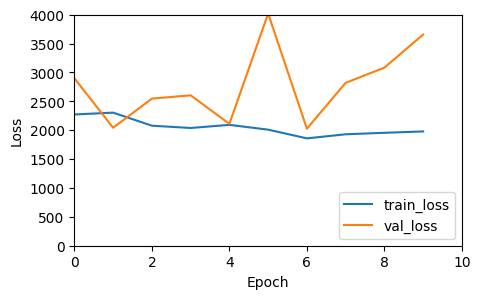

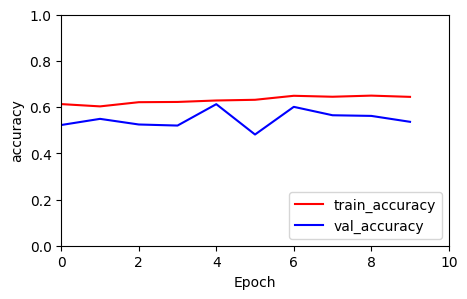

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.figure(figsize=(5,3))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 4000])
plt.xlim([0, 10])
plt.legend(loc='lower right')

plt.figure(2)
plt.figure(figsize=(5,3))
plt.plot(history.history['accuracy'], label='train_accuracy', color = 'red')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy', color = 'blue')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.ylim([0, 1])
plt.xlim([0, 10])
plt.legend(loc='lower right')

`-----------------------------------------------------`
##  <font color='red'>Overfit model</font>

here we will use a model that will result in overfitting as you will see the model will work well on traiing dataset and not good on validation dataset

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3))) #it's 32 filters of 3x3x3 (2d resluts in 2d)
model.add(Flatten())
model.add(Dense(5,'softmax'))

model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 flatten_10 (Flatten)        (None, 2064512)           0         
                                                                 
 dense_9 (Dense)             (None, 5)                 10322565  
                                                                 
Total params: 10,323,461
Trainable params: 10,323,461
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'],)
history2 = model.fit(train_dataset,
                    epochs = 10,
                    validation_data = valid_dataset,
                    )

Epoch 1/10
469/469 [==============================] - 30s 62ms/step - loss: 392.8899 - accuracy: 0.4718 - val_loss: 3.7844 - val_accuracy: 0.4876
Epoch 2/10
469/469 [==============================] - 29s 61ms/step - loss: 1.2194 - accuracy: 0.7607 - val_loss: 3.7567 - val_accuracy: 0.5270
Epoch 3/10
469/469 [==============================] - 33s 70ms/step - loss: 0.6017 - accuracy: 0.8743 - val_loss: 3.8259 - val_accuracy: 0.5432
Epoch 4/10
469/469 [==============================] - 31s 65ms/step - loss: 0.4302 - accuracy: 0.9115 - val_loss: 4.2702 - val_accuracy: 0.5280
Epoch 5/10
469/469 [==============================] - 32s 68ms/step - loss: 0.3867 - accuracy: 0.9248 - val_loss: 4.8924 - val_accuracy: 0.5416
Epoch 6/10
469/469 [==============================] - 29s 62ms/step - loss: 0.4531 - accuracy: 0.9306 - val_loss: 5.7755 - val_accuracy: 0.5242
Epoch 7/10
469/469 [==============================] - 30s 63ms/step - loss: 0.4411 - accuracy: 0.9175 - val_loss: 6.1475 - val_accurac

<Figure size 640x480 with 0 Axes>

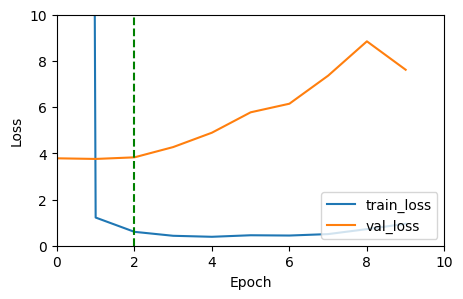

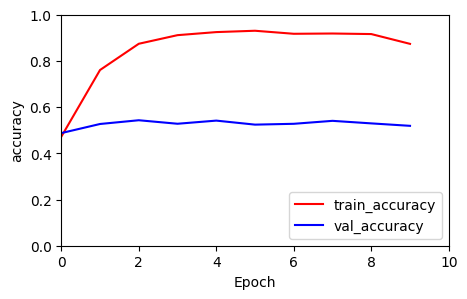

In [ ]:
import matplotlib.pyplot as plt
plt.figure(3)
plt.figure(figsize=(5,3))
plt.plot(history2.history['loss'], label='train_loss')
plt.plot(history2.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 10])
plt.xlim([0, 10])
plt.legend(loc='lower right')
plt.axvline(2, color = 'green', linestyle = 'dashed')

plt.figure(4)
plt.figure(figsize=(5,3))
plt.plot(history2.history['accuracy'], label='train_accuracy', color = 'red')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy', color = 'blue')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.ylim([0, 1])
plt.xlim([0, 10])
plt.legend(loc='lower right')

as we can see the model is overfit because after some epochs the training loss is decreasing and the validation loss is increasing(after the dashed green line)! this means the model is overfit and the accuracy is acceptable for training but not good for validation. 
the reason for this is the model is too complicated there are 10000000 parameters! 
so we should use hyper parameter tuning for simplifying the model. 

`-----------------------------------------------------`
##  <font color='green'>Best fit model</font>

here we'll use wandb to find a better learning rate for the overfit model!

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.backend import flatten
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten , Conv2D , MaxPooling2D

#the overfit model:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3))) #it's 32 filters of 3x3x3 (2d resluts in 2d)
model3.add(Flatten())
model3.add(Dense(5,'softmax'))

model3.summary()
#-----------------------------------------------------

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 flatten (Flatten)           (None, 2064512)           0         
                                                                 
 dense (Dense)               (None, 5)                 10322565  
                                                                 
Total params: 10,323,461
Trainable params: 10,323,461
Non-trainable params: 0
_________________________________________________________________


In [ ]:
!pip install --upgrade wandb

In [ ]:
import wandb
learning_rate = wandb.config.learning_rate
optimizer = keras.Adam(learning_rate = learning_rate)
model.compile(loss = 'categorical_crossentropy',optimizer = optimizer, metrics = ['accuracy'])

# PART 2

---

## 1.feature extraction

first we will import the dataset from folder

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.backend import flatten
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten , Conv2D , MaxPooling2D

train_dataset = keras.utils.image_dataset_from_directory(
    directory =  '/content/HW02-Practical/Dataset/train',labels = 'inferred',label_mode = 'categorical',
    batch_size=32,
    image_size=(224, 224),
    interpolation="bilinear",)

valid_dataset = keras.utils.image_dataset_from_directory(
    directory =  '/content/HW02-Practical/Dataset/valid',labels = 'inferred',label_mode = 'categorical',
    batch_size=32,
    image_size=(224, 224),
    interpolation="bilinear",)

test_dataset = keras.utils.image_dataset_from_directory(
    directory =  '/content/HW02-Practical/Dataset/test',labels = 'inferred',label_mode = 'categorical',
    batch_size=32,
    image_size=(224, 224),
    interpolation="bilinear",)

Found 15000 files belonging to 5 classes.
Found 5000 files belonging to 5 classes.
Found 5000 files belonging to 5 classes.


here we import a pre-trained model in tf.keras library (resnet50) 
then we will freeze the pretrained weights
using the ```trinable = False```   
in the next step we'll add some extra layers ourselves on top of the ResNet model (a global average pooling layer and a dense layer with 5 neurons and softmax activation)

In [ ]:
#import pretrained model:
model4 = keras.applications.ResNet50(
    weights="imagenet",
    input_shape=(224, 224, 3),
    include_top=False
)
#freeze the pretrained layers:
model4.trainable = False
#add extra layers on top:
inputs = keras.Input(shape=(224, 224, 3))
x = model4(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(5,activation = 'softmax')(x)
top_model = keras.Model(inputs, outputs)

94765736/94765736 [==============================] - 0s 0us/step


now we will compile the hybrid model(with frozen pretrained layers and new custom layers(trainable))
then we'll fit the model(only change unfrozen layers weights)
also 5-6 epochs is enough before overfitting (early stopping)

In [ ]:
top_model.compile(optimizer=keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = top_model.fit(train_dataset,
                    epochs = 6,
                    validation_data = valid_dataset,
                    )

Epoch 1/6
469/469 [==============================] - 79s 142ms/step - loss: 0.4786 - accuracy: 0.8208 - val_loss: 0.5094 - val_accuracy: 0.8052
Epoch 2/6
469/469 [==============================] - 60s 126ms/step - loss: 0.2802 - accuracy: 0.9016 - val_loss: 0.4526 - val_accuracy: 0.8362
Epoch 3/6
469/469 [==============================] - 60s 128ms/step - loss: 0.2327 - accuracy: 0.9166 - val_loss: 0.3707 - val_accuracy: 0.8644
Epoch 4/6
469/469 [==============================] - 61s 130ms/step - loss: 0.2001 - accuracy: 0.9287 - val_loss: 0.3963 - val_accuracy: 0.8582
Epoch 5/6
469/469 [==============================] - 61s 130ms/step - loss: 0.1769 - accuracy: 0.9397 - val_loss: 0.3654 - val_accuracy: 0.8720
Epoch 6/6
469/469 [==============================] - 62s 131ms/step - loss: 0.1647 - accuracy: 0.9423 - val_loss: 0.3857 - val_accuracy: 0.8664


## 2 . fine tuning 

now all we have to do is to unfreeze the pretrained layers so we fine tune all then we will recompile and  fit the model again.

In [ ]:
# Unfreeze the base model
model4.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account

top_model.compile(optimizer=keras.optimizers.Adam(1e-5),#small learning rate is better 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = top_model.fit(train_dataset,
                    epochs = 10,
                    validation_data = valid_dataset,
                    )

Epoch 1/10
469/469 [==============================] - 217s 366ms/step - loss: 0.1409 - accuracy: 0.9509 - val_loss: 0.2900 - val_accuracy: 0.9058
Epoch 2/10
469/469 [==============================] - 172s 366ms/step - loss: 0.0366 - accuracy: 0.9885 - val_loss: 0.2737 - val_accuracy: 0.9230
Epoch 3/10
469/469 [==============================] - 173s 368ms/step - loss: 0.0136 - accuracy: 0.9966 - val_loss: 0.3532 - val_accuracy: 0.9132
Epoch 4/10
469/469 [==============================] - 173s 369ms/step - loss: 0.0113 - accuracy: 0.9969 - val_loss: 0.3327 - val_accuracy: 0.9160
Epoch 5/10
469/469 [==============================] - 170s 363ms/step - loss: 0.0124 - accuracy: 0.9958 - val_loss: 0.3196 - val_accuracy: 0.9266
Epoch 6/10
469/469 [==============================] - 173s 368ms/step - loss: 0.0099 - accuracy: 0.9971 - val_loss: 0.2811 - val_accuracy: 0.9358
Epoch 7/10
469/469 [==============================] - 170s 363ms/step - loss: 0.0099 - accuracy: 0.9967 - val_loss: 0.3024 -

this will also calculate the best learning rate using wandb

In [ ]:
import wandb
learning_rate = wandb.config.learning_rate
optimizer = keras.Adam(learning_rate = learning_rate)
top_model.compile(loss = 'categorical_crossentropy',optimizer = optimizer, metrics = ['accuracy'])